<a href="https://colab.research.google.com/github/mleyvaz/Neural-networks/blob/main/Baggin_Experimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from numpy import mean
from numpy import std
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from mlxtend.evaluate import paired_ttest_5x2cv
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier

In [2]:

import pandas as pd
dataframe = pd.read_csv("https://raw.githubusercontent.com/jeffheaton/aifh/master/vol1/python-examples/datasets/breast-cancer-wisconsin.csv", engine="python")

In [3]:
dataframe.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
dataframe.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


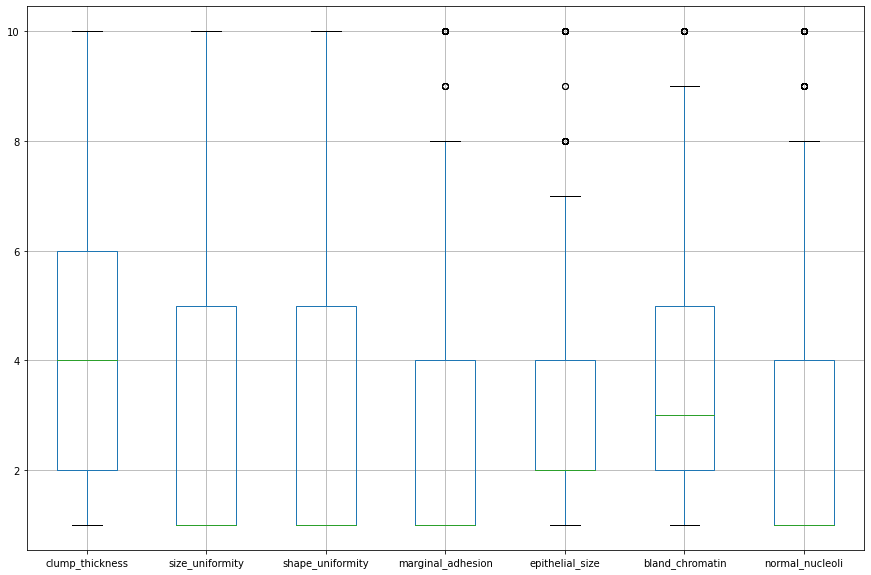

In [5]:
boxplot = dataframe.boxplot(column=["clump_thickness",	"size_uniformity", 	"shape_uniformity",	"marginal_adhesion",	"epithelial_size",	"bland_chromatin"	, "normal_nucleoli"	], figsize=(15, 10))

In [85]:
# define dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
# Evaluar modelo 1
model1 = LinearDiscriminantAnalysis()
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores1 = cross_val_score(model1, X, y, scoring='precision', cv=cv1, n_jobs=-1)
print('A1lisis_discriminante_lineal precision: %.3f (%.3f)' % (mean(scores1), std(scores1)))
# evaluate model 2
# https://es.wikipedia.org/wiki/An%C3%A1lisis_discriminante_lineal
model2 = BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(n_components=None,
                                                            priors=None,
                                                            shrinkage=None,
                                                            solver='svd',
                                                            store_covariance=False,
                                                            tol=0.0001),
                  bootstrap=False, bootstrap_features=True, max_features=0.8,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=7882, verbose=0,
                  warm_start=False)
cv2 = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 = cross_val_score(model2, X, y, scoring='precision', cv=cv2, n_jobs=-1)
print('Baggin: %.3f (%.3f)' % (mean(scores2), std(scores2)))
# Comprobar si las diferencias son significativas 
t, p = paired_ttest_5x2cv(estimator1=model1, estimator2=model2, X=X, y=y, scoring='precision', random_seed=1)
# Resumen
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
# interpret the result
if p <= 0.05:
	print('Difference between mean performance is probably real')
else:
	print('Algorithms probably have the same performance')

A1lisis_discriminante_lineal precision: 0.938 (0.025)
Baggin: 0.941 (0.030)
P-value: 0.040, t-Statistic: 2.747
Difference between mean performance is probably real
